# Linear regression

Linear regression is the simplest model of machine learning. 
The purpose of regression is to explain and predict a variable $y$ using a variable $x$ (or several variables $x_{(1)}$, ...,$x_{(n)}$ ).  

The variable $y$ is called the **target** (dependent variable) , and the variables $x$ are called  **feature(s)** (independent variables).

By convention, we call the number of rows ``m``. The number of features is represented by ``n``.

In this example, ``m=7`` and ``n=3``

![image dataset](./assets/example_data.png)

## Modeling the problem
In this chapter, we will analyze simple linear regression on an example. This presentation will allow us to explain linear regression in a simple case in order to understand the stakes of this method, the problems posed and the answers brought.

Let's take this dataset which contains data on an employee's salary based on his years of experience.

In [7]:
import pandas as pd

df = pd.read_csv("./data/salary_data.csv")

In [8]:
df.head(2)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205


**Exercise :** Find the value of $m$ and $n$ of this dataset.

In [9]:
print(f"\tm value:\t{df.shape[0]} \n\tn value:\t{df.columns.size}")
m=df.shape[0]
n=df.columns.size

	m value:	30 
	n value:	2


### 1. Goals
We want to know whether, in general, years of experience have an influence on the wage and in what form this influence can be expressed. The goal is to better explain how wages vary with years of experience and possibly to predict wages based on years of experience.

### 2. Variables studied
In this example, we are going to do a simple regression and we will therefore define two variables.
- The variable y is the variable that must be regressed. The target to be predicted.

- The variable x which will be the explanatory variable. The feature.

**Exercise :**  Create the ``x`` and ``y`` variables and define which column will be the target and which column will be the feature.  
Variables ``x`` and ``y`` must of type numpy.ndarray

In [10]:
import numpy as np
y=np.array(df.Salary)
x=np.array(df.YearsExperience)

print(f"The target variable y: {y}\tThe feature variable x: {x}")

The target variable y: [ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]	The feature variable x: [ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]


### 3. Relationship between variables
Now it is a question of finding the type of relationship between the two variables.

To do so, we will display the x variables in a scatterplot. Let's see what kind of relation we could obtain :


**No correlation.**  

Very rounded scatterplot, there is no apparent relationship.
![](./assets/scatter_plot_0.png)

**Positive linear correlation.**  
Very stretched scatterplot. The cloud has a very marked linear shape. There is a tendency for X and Y to vary in the same direction. The observed correlation is positive.

![](./assets/scatter_plot_1.png)

**Negative Linear correlation.**  
The scatterplot is moderately stretched (linear form less marked), from top left to bottom right: one observes on the sample a tendency of X and Y to vary in opposite directions, the observed correlation is negative.

![](./assets/scatter_plot_2.png)

**Perfect non-linear correlation.**  
The points are on a non-linear (parabolic) curve. The correlation observed is perfect, non-linear. There is no monotonicity: the curve is first decreasing and then increasing.

![](./assets/scatter_plot_3.png)

Now let's visualize our dataset on a scatter plot:

**Exercise :** Create a scatter plot with matplotlib and the x and y data.  
Add the label salary for the y-axis and number of years of experience for the x-axis.

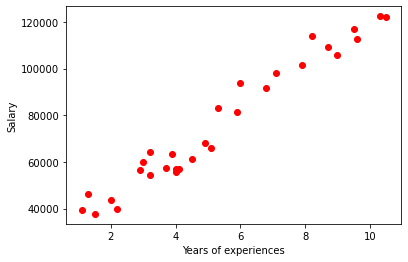

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x,y, color='r')
plt.xlabel("Years of experiences")
plt.ylabel("Salary")

plt.show()

You should see the stretched and increasing shape of the scatterplot suggest a linear-type postive correlation.

We can also check the correlation rate between the variables. 

**Exercise :** Display the correlation rate between the two variables. 

correlation rate between the two variables: 0.9782416184887599


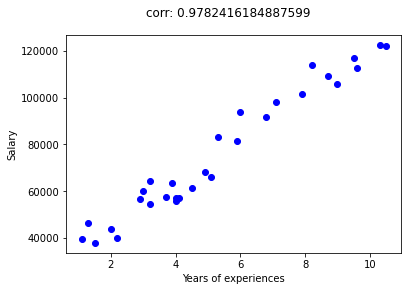

In [12]:
# np.corrcoef(x,y) numpy's way bring up correlation matrix
#pandas way

X = df.YearsExperience
Y = df.Salary

fig, ax = plt.subplots()

# Calculation of corroletion coef between Salary function of years of experience
corroletion_coef_salary_years_of_exp = X.corr(Y)
print(f"correlation rate between the two variables: {corroletion_coef_salary_years_of_exp}")
ax.scatter(X,Y, color='b')

fig.suptitle(f"corr: {corroletion_coef_salary_years_of_exp}")
ax.set(xlabel="Years of experiences")
ax.set(ylabel="Salary")
plt.show()

### 4. Split the dataset

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem.

Generally, the training dataset contains 80% of the whole dataset. The remaining 20% is for the test dataset.

**Exercise :** Import train_test_split from sklearn and split the dataset and create the variables ``X_train``, ``X_test``, ``y_train``, ``y_test``.

In [13]:
#Split variables
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


### 5. Load and fit the model

We could see that the Linear Model could help us to make good generalizations about our dataset. However, our model has to train several times on our training_set. It is therefore an iterative algorithm. And at each iteration, the algorithm will calculate the error rate of the mean of the trained data set. The algorithm will then try to regress this error rate until it is minimized as possible. 

But we are lucky because the sklearn library already has a ready-made Linaire model that minimizes this error rate. 

**Exercise :** 
1. Import ``LinearRegression`` from sklearn
2. Create a ``regressor`` variable and instantiate your ``LinearRegression`` class.
2. Train your model with ``X_train`` and ``y_train``

In [14]:
#Import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

#Create a regressor variable and instantiate your LinearRegression class.
regressor = LinearRegression()


#Train your model with X_train and y_train
regressor.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

OK, Your model is trained.   
But let's check if our model is efficient. To do this we can display the score of our model. That is to say the number of correct predictions that our model was able to make.

**Exercise :** Display the score of your model with ``X_train`` and ``y_train``.

In [15]:
regressor.score(X_train.reshape(-1, 1), y_train)

0.9411949620562126

Do you have a score above 90% ?   
That's not bad! But let's check now if our model can make generalizations about data it has never seen before. 

### 6. Test your model
The X_test and y_test set was previously created. Now it is time to use it. 

**Exercise :** Use the ``predict`` method of your model on your test dataset (``X_test``).

In [16]:
regressor.predict(X_test.reshape(-1, 1))

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

**Exercise :** Display the score of your model with ``X_test`` and ``y_test``.

In [17]:
regressor.score(X_test.reshape(-1, 1), y_test)

0.988169515729126

What's your score? Is it higher than 90%? Awesome!  
To make it more meaningful, we are going to visualize the training and testing of your model.  

**Exercise :** 
1. Plot ``regressor.predict(X_train)``
2. Add the title "Salary VS Experience (Training set)"
3. Add the label "Year of Experience" on the x-axis and "Salary" on the y-axis


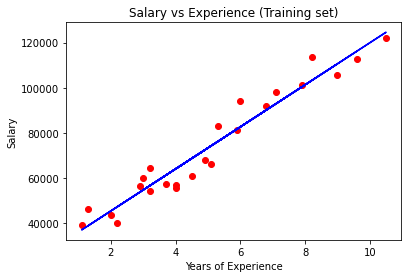

In [18]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train.reshape(-1, 1)), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [19]:
regressor.predict([[210]])

array([1982420.87576376])

The expected result should look like this: 
![train_plot](./assets/trainplot.png)

**Exerscise :** Do the same with X_test!  
1. Plot ``regressor.predict(X_test)``
2. Add the title "Salary VS Experience (Test set)"
3. Add the label "Year of Experience" on the x-axis and "Salary" on the y-axis

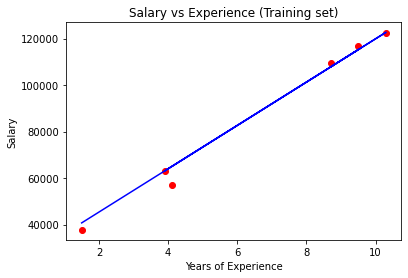

array([1982420.87576376])

In [20]:
plt.scatter(X_test, y_test, color='r')
plt.plot(X_test, regressor.predict(X_test.reshape(-1, 1)), color='b')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

regressor.predict([[210]])

The expected result should look like this:
![testplot.png](./assets/testplot.png)

**Exercise :** Have fun testing your model by entering new data. To give you an example, according to my model, when I have 210 years of experience, I will earn a salary of 1,982,420 / year. I'm looking forward to reaching that many years of experience 😎.

Congratulations to you! You have just created your first learning machine model. 

![bravo](./assets/bravo.gif)